<a href="https://colab.research.google.com/github/liliansom/med_ind/blob/main/med_ind_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atividades a serem desenvolvidas:

1. Limpeza e Pré-processamento de Dados:

* Lidar com valores ausentes: Decidir se vai imputar, preencher ou remover linhas/colunas com dados faltantes.
* Tratar outliers: Identificar e lidar com outliers que podem distorcer a análise.
* Converter tipos de dados, se necessário, garantindo que colunas relacionadas a datas estejam no formato correto.

2. Análise Exploratória de Dados (EDA):
* Tendências de Vendas:
  * Vendas mensais: Identificar se há meses com vendas excepcionalmente altas ou baixas.
  * Análise por estado (UF_VENDA): Quais estados têm o maior número de vendas? Existem padrões regionais?
  * Produtos Mais Vendidos:
    Baseado no PRINCIPIO_ATIVO: Quais são os medicamentos mais populares?

    Baseado na DESCRICAO_APRESENTACAO: Quais apresentações ou dosagens são mais vendidas?
  * Demografia dos Consumidores:
    Distribuição de idade dos compradores.
    Distribuição de gênero dos compradores.
  * Correlações:
    Existe uma correlação entre o tipo de medicamento e a idade do comprador?
    Existe uma correlação entre o gênero do comprador e o tipo de medicamento?

3. Visualização de Dados:
* Gráficos de barras para mostrar as vendas por estado, por medicamento e por gênero.
* Histogramas para distribuição de idade.
* Heatmaps para correlações.
* Gráficos de linha para tendências de vendas ao longo dos meses.

4. Insights e Recomendações:
* Com base na EDA, identifique insights interessantes sobre os hábitos de compra e padrões.
* Formule recomendações para farmácias ou empresas farmacêuticas com base nas tendências observadas.

# Importando base e bibliotecas

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/My Drive/Colab Notebooks/med_ind_2021_11/EDA_Industrializados_202111.csv'

[Errno 20] Not a directory: '/content/drive/My Drive/Colab Notebooks/med_ind_2021_11/EDA_Industrializados_202111.csv'
/content


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/med_ind_2021_11/EDA_Industrializados_202111.csv', encoding='latin1', delimiter=';')


In [4]:
display(df)

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,CID10,SEXO,IDADE,UNIDADE_IDADE
0,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,1.0,37.0,1.0
1,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,1.0,40.0,1.0
2,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,2,CAIXA,CRM,MT,5.0,NaN,1.0,45.0,1.0
3,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,5,CAIXA,CRM,MT,5.0,NaN,2.0,34.0,1.0
4,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5.0,NaN,2.0,36.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785563,2021,11,RJ,NOVA FRIBURGO,FOSFOMICINA TROMETAMOL,"5,631G GRAN CT ENV AL PE X 8G",1,FRASCO,CRM,RJ,5.0,NaN,2.0,85.0,1.0
2785564,2021,11,RJ,NOVA FRIBURGO,GABAPENTINA,300 MG CAP DURA CT BL AL AL X 30,2,CAIXA,CRO,RJ,1.0,NaN,NaN,NaN,NaN
2785565,2021,11,RJ,NOVA FRIBURGO,GABAPENTINA,300 MG CAP DURA CT BL AL PLAS OPC X 30,1,CAIXA,CRM,RJ,1.0,NaN,1.0,45.0,1.0
2785566,2021,11,RJ,NOVA FRIBURGO,GABAPENTINA,300 MG CAP DURA CT BL AL PLAS OPC X 30,1,CAIXA,CRM,RJ,1.0,NaN,1.0,65.0,1.0


# Dicionário de Dados

* ANO_VENDA: Ano da venda do medicamento.
* MES_VENDA: Mês da venda do medicamento.
* UF_VENDA: Unidade Federativa do endereço da farmácia ou drogaria, cadastrado no banco de dados da Anvisa, representando a UF onde ocorreu a venda.
* MUNICIPIO_VENDA: Município do endereço da farmácia ou drogaria, cadastrado no banco de dados da Anvisa, representando o Município onde ocorreu a venda.
* PRINCIPIO_ATIVO: Nome do princípio ativo do medicamento industrializado, conforme cadastrado no registro do medicamento, no banco de dados da Anvisa. Quando um medicamento tem mais de um princípio ativo, cada
um deles é separado pelo caractere “+”.
* DESCRICAO_APRESENTACAO: Uma Apresentação de Medicamento representa O modo como um medicamento é apresentado na embalagem.
* QTD_VENDIDA: Quantidade vendida de caixas ou frascos do medicamento.
* UNIDADE_MEDIDA: Indica se a quantidade vendida do medicamento foi de caixas ou frascos.
* CONSELHO_PRESCRITOR: Conselho de Classe do profissional que prescreveu o medicamento vendido.
* UF_CONSELHO_PRESCRITOR: Unidade Federativa do Conselho de Classe do profissional que prescreveu o medicamento vendido.
* TIPO_RECEITUARIO: Tipo de receituário utilizado na prescrição. Valores e respectivos tipos de receituário:
(1) Receita de Controle Especial em 2 vias (Receita Branca);
(2) Notificação de Receita B (Notificação Azul);
(3) Notificação de Receita Especial (Notificação Branca);
(4) Notificação de Receita A (Notificação Amarela);
(5) Receita Antimicrobiano em 2 vias.
* CID10: Classificação Internacional de Doença (aplicável apenas a medicamentos antimicrobianos).
* SEXO: Sexo do paciente (aplicável apenas a medicamentos
antimicrobianos). (1) sexo masculino, (2) sexo feminino.
* IDADE: Valor numérico que representa a idade do paciente, em meses ou anos (aplicável apenas a medicamentos antimicrobianos).
* UNIDADE_IDADE: Unidade de medida da idade do paciente, que pode ser em meses ou anos (aplicável apenas a medicamentos
antimicrobianos). (1) unidade de medida em anos,
(2) unidade de medida em meses.

# Análise Exploratória dos Dados

In [5]:
df.shape

(2785568, 15)

In [6]:
# Tipos das colunas
df.dtypes

ANO_VENDA                   int64
MES_VENDA                   int64
UF_VENDA                   object
MUNICIPIO_VENDA            object
PRINCIPIO_ATIVO            object
DESCRICAO_APRESENTACAO     object
QTD_VENDIDA                 int64
UNIDADE_MEDIDA             object
CONSELHO_PRESCRITOR        object
UF_CONSELHO_PRESCRITOR     object
TIPO_RECEITUARIO          float64
CID10                      object
SEXO                      float64
IDADE                     float64
UNIDADE_IDADE             float64
dtype: object

In [7]:
# Valores nulos
df.isnull().sum()

ANO_VENDA                       0
MES_VENDA                       0
UF_VENDA                        0
MUNICIPIO_VENDA                 0
PRINCIPIO_ATIVO              4827
DESCRICAO_APRESENTACAO          0
QTD_VENDIDA                     0
UNIDADE_MEDIDA                  0
CONSELHO_PRESCRITOR             0
UF_CONSELHO_PRESCRITOR          0
TIPO_RECEITUARIO                0
CID10                     2774250
SEXO                       995525
IDADE                      995525
UNIDADE_IDADE              995525
dtype: int64

In [8]:
df.describe()

,ANO_VENDA,MES_VENDA,QTD_VENDIDA,TIPO_RECEITUARIO,SEXO,IDADE,UNIDADE_IDADE
count,2785568.0,2785568.0,2.785568e+06,2.785568e+06,1.790043e+06,1.790043e+06,1.790043e+06
mean,2021.0,11.0,4.136976e+00,3.397355e+00,1.552497e+00,4.080762e+01,1.015238e+00
std,0.0,0.0,6.705600e+02,1.865048e+00,4.972365e-01,4.218355e+01,1.224989e-01
min,2021.0,11.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2021.0,11.0,1.000000e+00,1.000000e+00,1.000000e+00,2.500000e+01,1.000000e+00
50%,2021.0,11.0,1.000000e+00,5.000000e+00,2.000000e+00,3.900000e+01,1.000000e+00
75%,2021.0,11.0,3.000000e+00,5.000000e+00,2.000000e+00,5.500000e+01,1.000000e+00
max,2021.0,11.0,7.898310e+05,5.000000e+00,2.000000e+00,9.990000e+02,2.000000e+00


In [9]:
df_new = df.copy()

# Tratamento dos Dados

## Nulos
* CID10: Aplicado apenas para medicamentos antimicrobianos. Conclusão: Retirar coluna do CID10.
* Princípio Ativo dá para ver o que fazer. Conclusão: Imputar "Não informado".
* Sexo, Idade, Unidade_Idade são campos preenchidos apenas quando medicamentos antimicrobianos. Imputar 0 neles.

## Tipos
* SEXO, TIPO_RECEITUARIO e UNIDADE_MEDIDA estão como float, deveriam ser int
* ANO_VENDA e MES_VENDA estão como int, inserir como date. Apesar de que não será realizada nenhuma comparação no momento...

## Outliers
* IDADE: Analisar boxplot separando pela UNIDADE_MEDIDA
* QTD_VENDIDA: Analisar boxplot



## Tratamento Valores Nulos e Tipos de colunas

In [10]:
# Retirando coluna CID10
df_new = df_new.drop('CID10', axis=1)

# Imputando valores
df_new['SEXO'].fillna(0, inplace=True)
df_new['IDADE'].fillna(0, inplace=True)
df_new['TIPO_RECEITUARIO'].fillna(0, inplace=True)
df_new['UNIDADE_IDADE'].fillna(0, inplace=True)
df_new['PRINCIPIO_ATIVO'].fillna('INDEFINIDO', inplace=True)


# Tratando tipo de colunas
df_new['SEXO'] = df_new['SEXO'].astype(int)
df_new['UNIDADE_IDADE'] = df_new['UNIDADE_IDADE'].astype(int)
df_new['TIPO_RECEITUARIO'] = df_new['TIPO_RECEITUARIO'].astype(int)
df_new['IDADE'] = df_new['IDADE'].astype(int)

df_new['ANO_VENDA'] = pd.to_datetime(df_new['ANO_VENDA'], format='%Y')
df_new['ANO_VENDA'] = df_new['ANO_VENDA'].dt.year
df_new['MES_VENDA'] = pd.to_datetime(df_new['MES_VENDA'], format='%m')
df_new['MES_VENDA'] = df_new['MES_VENDA'].dt.month

## Outliers Idade

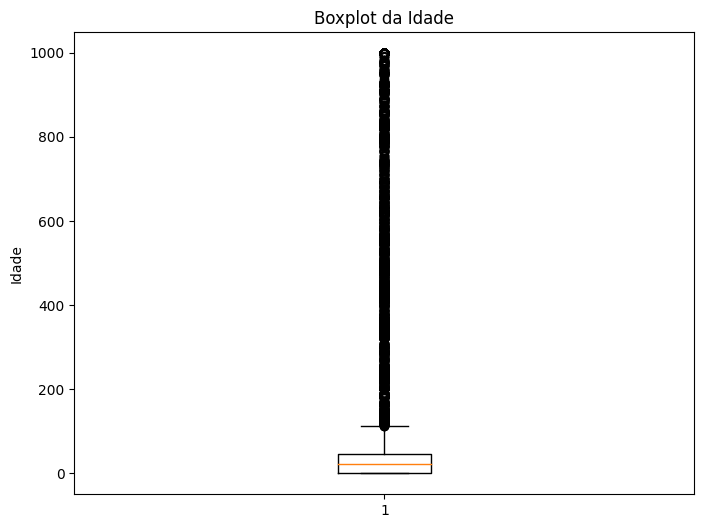

In [11]:
plt.figure(figsize=(8, 6))  # Define o tamanho da figura (opcional)
plt.boxplot(df_new['IDADE'])
plt.title('Boxplot da Idade')
plt.ylabel('Idade')
plt.show()

In [12]:
# UNIDADE_IDADE = Anos
out_idade = df_new[df_new['UNIDADE_IDADE'] == 1]
out_idade['UNIDADE_IDADE'].value_counts()

1    1762766
Name: UNIDADE_IDADE, dtype: int64

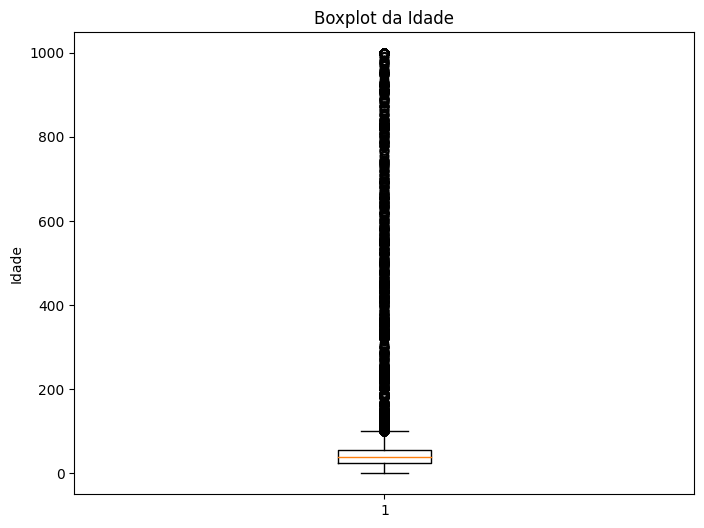

In [13]:
plt.figure(figsize=(8, 6))  # Define o tamanho da figura (opcional)
plt.boxplot(out_idade['IDADE'])
plt.title('Boxplot da Idade')
plt.ylabel('Idade')
plt.show()

In [14]:
# UNIDADE_IDADE = Meses
out_idade = df_new[df_new['UNIDADE_IDADE'] == 2]
out_idade['UNIDADE_IDADE'].value_counts()

2    27277
Name: UNIDADE_IDADE, dtype: int64

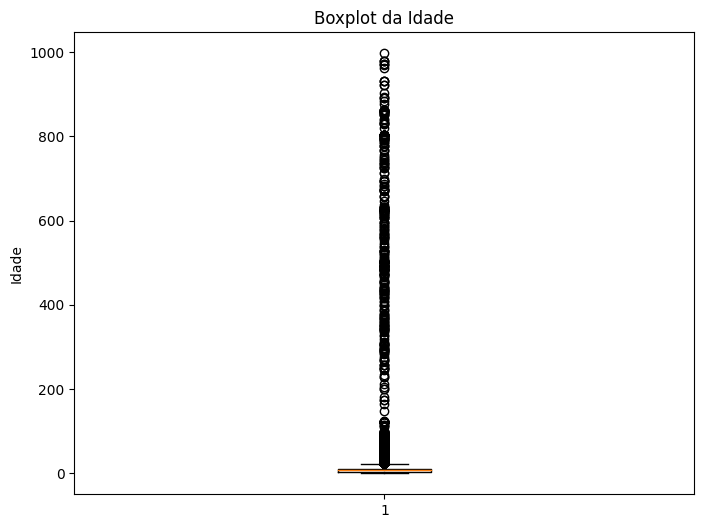

In [15]:
plt.figure(figsize=(8, 6))  # Define o tamanho da figura (opcional)
plt.boxplot(out_idade['IDADE'])
plt.title('Boxplot da Idade')
plt.ylabel('Idade')
plt.show()

In [16]:
out_idade = df_new[df_new['UNIDADE_IDADE'] == 2]
display(out_idade['IDADE'])

71          8
135         2
418         1
502         5
512         5
           ..
2784586    15
2784657     9
2784962    11
2785319     1
2785387     3
Name: IDADE, Length: 27277, dtype: int64

In [17]:
# Calcular o primeiro quartil (Q1) e o terceiro quartil (Q3)
Q1 = df_new['IDADE'].quantile(0.25)
Q3 = df_new['IDADE'].quantile(0.75)

# Calcular o IQR
IQR = Q3 - Q1

# Calcular o limite superior
LS = Q3 + 1.5 * IQR

# Filtrar o DataFrame para remover outliers
df_filtrado = df_new[df_new['IDADE'] <= LS]

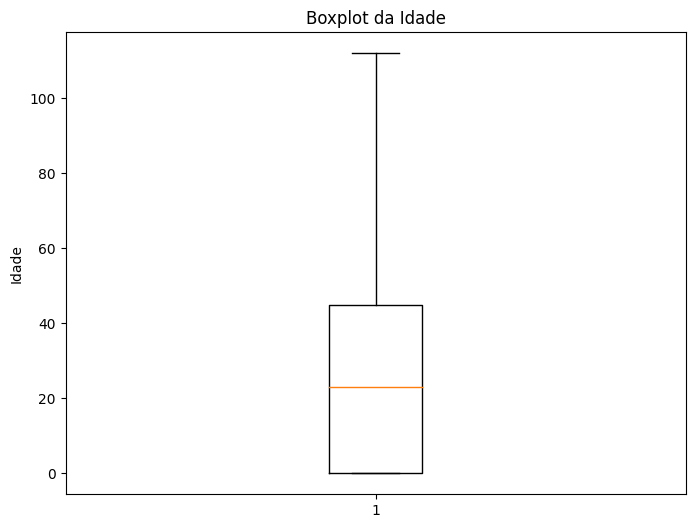

In [18]:
plt.figure(figsize=(8, 6))  # Define o tamanho da figura (opcional)
plt.boxplot(df_filtrado['IDADE'])
plt.title('Boxplot da Idade')
plt.ylabel('Idade')
plt.show()

## Outliers QTD_VENDIDA

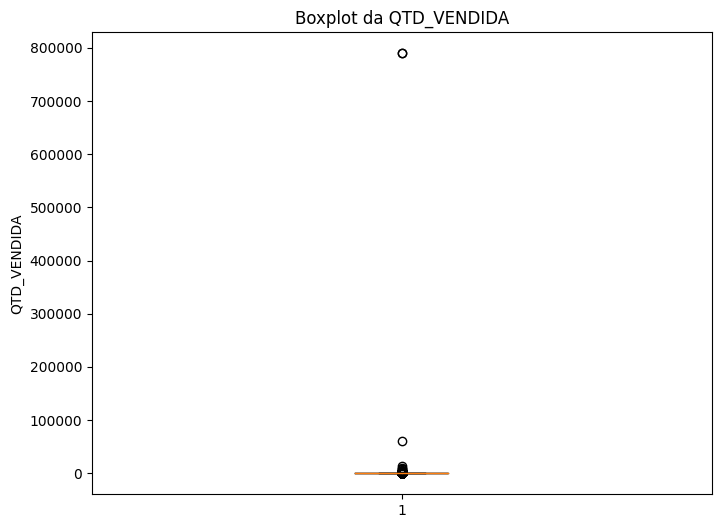

In [19]:
plt.figure(figsize=(8, 6))  # Define o tamanho da figura (opcional)
plt.boxplot(df_filtrado['QTD_VENDIDA'])
plt.title('Boxplot da QTD_VENDIDA')
plt.ylabel('QTD_VENDIDA')
plt.show()

In [20]:
# Calcular o primeiro quartil (Q1) e o terceiro quartil (Q3)
Q1 = df_filtrado['QTD_VENDIDA'].quantile(0.25)
Q3 = df_filtrado['QTD_VENDIDA'].quantile(0.75)

# Calcular o IQR
IQR = Q3 - Q1

# Calcular o limite superior
LS = Q3 + 1.5 * IQR

# Filtrar o DataFrame para remover outliers
df_filtrado = df_filtrado[df_filtrado['QTD_VENDIDA'] <= LS]

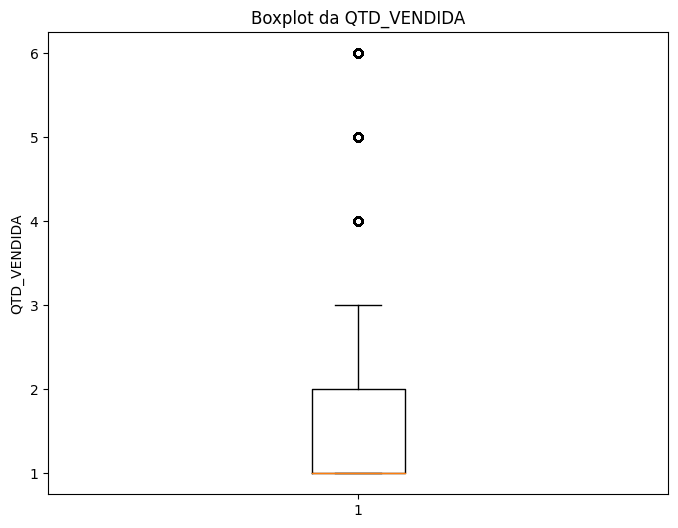

In [21]:
plt.figure(figsize=(8, 6))  # Define o tamanho da figura (opcional)
plt.boxplot(df_filtrado['QTD_VENDIDA'])
plt.title('Boxplot da QTD_VENDIDA')
plt.ylabel('QTD_VENDIDA')
plt.show()

In [22]:
display(df_filtrado)

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,SEXO,IDADE,UNIDADE_IDADE
0,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5,1,37,1
1,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5,1,40,1
2,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,2,CAIXA,CRM,MT,5,1,45,1
3,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,5,CAIXA,CRM,MT,5,2,34,1
4,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5,2,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785563,2021,11,RJ,NOVA FRIBURGO,FOSFOMICINA TROMETAMOL,"5,631G GRAN CT ENV AL PE X 8G",1,FRASCO,CRM,RJ,5,2,85,1
2785564,2021,11,RJ,NOVA FRIBURGO,GABAPENTINA,300 MG CAP DURA CT BL AL AL X 30,2,CAIXA,CRO,RJ,1,0,0,0
2785565,2021,11,RJ,NOVA FRIBURGO,GABAPENTINA,300 MG CAP DURA CT BL AL PLAS OPC X 30,1,CAIXA,CRM,RJ,1,1,45,1
2785566,2021,11,RJ,NOVA FRIBURGO,GABAPENTINA,300 MG CAP DURA CT BL AL PLAS OPC X 30,1,CAIXA,CRM,RJ,1,1,65,1


# Análise Descritiva

## 10 Estados que mais venderam medicamentos

In [23]:
display(df_filtrado['UF_VENDA'].value_counts().sort_values(ascending=False).head(10).reset_index(drop=False))

,index,UF_VENDA
0,SP,535801
1,MG,373734
2,RS,221774
3,PR,207827
4,RJ,168040
5,GO,133498
6,BA,126284
7,SC,120303
8,PE,79220
9,PB,59447


## 10 Medicamentos mais vendidos

In [24]:
display(df_filtrado['PRINCIPIO_ATIVO'].value_counts().sort_values(ascending=False).head(10).reset_index(drop=False))

,index,PRINCIPIO_ATIVO
0,AZITROMICINA DI-HIDRATADA,174089
1,AMOXICILINA TRI-HIDRATADA,116385
2,AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POT...,97663
3,AMOXICILINA + CLAVULANATO DE POTÁSSIO,77076
4,CEFALEXINA MONOIDRATADA,62295
5,CEFALEXINA,58508
6,CLORIDRATO DE CIPROFLOXACINO,58137
7,AMOXICILINA,56526
8,OXALATO DE ESCITALOPRAM,52126
9,SULFAMETOXAZOL + TRIMETOPRIMA,50592


## 10 Apresentações mais vendidas

In [25]:
display(df_filtrado['DESCRICAO_APRESENTACAO'].value_counts().sort_values(ascending=False).head(10).reset_index(drop=False))

,index,DESCRICAO_APRESENTACAO
0,500 MG CAP DURA CT BL AL PLAS TRANS X 21,86269
1,500 MG COM REV CT BL AL PLAS TRANS X 14,66390
2,875 MG + 125 MG COM REV CT FR VD AMB X 14,28391
3,500 MG COM REV CT BL AL PLAS PVC TRANS X 5,28291
4,500 MG COM CT BL AL PLAS TRANS X 10,26677
5,875 MG + 125 MG COM REV CT BL AL/ AL X 14,18571
6,100 MG CAP GEL DURA CT BL AL PLAS TRANS X 28,17870
7,(5 + 1) MG/ML SOL OFT CT FR GOT PLAS PEBD OPC ...,17764
8,500 MG COM REV CT BL AL PLAS PVC OPC X 5,17558
9,"5,631 G GRAN CT ENV AL PE X 8 G",16811


## Distribuição de idade dos compradores

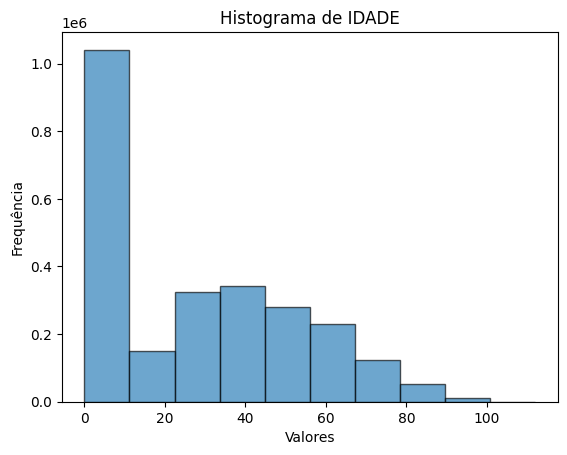

In [26]:
coluna_interesse = 'IDADE'

# Crie um histograma da coluna de interesse
plt.hist(df_filtrado[coluna_interesse], bins=10, edgecolor='k', alpha=0.65)
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title(f'Histograma de {coluna_interesse}')
plt.show()

## Distribuição de gênero dos compradores

In [27]:
df_filtrado['SEXO'].value_counts()

2    969984
0    806015
1    780753
Name: SEXO, dtype: int64

## Medicamentos mais Vendidos por Faixa Etária

In [28]:
faixa_etaria_inicial = 0
faixa_etaria_final = 100
incremento_faixa_etaria = 10

# Crie uma nova coluna 'FAIXA_ETARIA' com base na 'IDADE'
df_filtrado['FAIXA_ETARIA'] = pd.cut(df_filtrado['IDADE'],
                                    bins=range(faixa_etaria_inicial, faixa_etaria_final+1, incremento_faixa_etaria),
                                    right=False)

# Contar a ocorrência de cada medicamento em cada faixa etária
contagem_medicamentos = df_filtrado.groupby(['FAIXA_ETARIA', 'PRINCIPIO_ATIVO']).size().reset_index(name='Contagem')

# Encontrar o medicamento mais frequente em cada faixa etária
idx = contagem_medicamentos.groupby(['FAIXA_ETARIA'])['Contagem'].transform(max) == contagem_medicamentos['Contagem']
medicamentos_mais_frequentes_faixa_etaria = contagem_medicamentos[idx]

# Exibir os medicamentos mais frequentes por faixa etária
display(medicamentos_mais_frequentes_faixa_etaria)

,FAIXA_ETARIA,PRINCIPIO_ATIVO,Contagem
522,"[0, 10)",OXALATO DE ESCITALOPRAM,39145
731,"[10, 20)",AZITROMICINA DI-HIDRATADA,13199
1385,"[20, 30)",AZITROMICINA DI-HIDRATADA,27938
2039,"[30, 40)",AZITROMICINA DI-HIDRATADA,32350
2693,"[40, 50)",AZITROMICINA DI-HIDRATADA,24935
3347,"[50, 60)",AZITROMICINA DI-HIDRATADA,18125
4001,"[60, 70)",AZITROMICINA DI-HIDRATADA,12054
4655,"[70, 80)",AZITROMICINA DI-HIDRATADA,5908
5309,"[80, 90)",AZITROMICINA DI-HIDRATADA,2384
5937,"[90, 100)",AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POT...,612


## 10 Medicamentos mais utilizados por gênero

### Masculino

In [29]:
fr_med_sexo_1 = df_filtrado[df_filtrado['SEXO'] == 1]
fr_med_sexo_1 = fr_med_sexo_1['PRINCIPIO_ATIVO'].value_counts().head(10)
fr_med_sexo_1 = fr_med_sexo_1.reset_index(drop=False)

display(fr_med_sexo_1)

,index,PRINCIPIO_ATIVO
0,AZITROMICINA DI-HIDRATADA,83145
1,AMOXICILINA TRI-HIDRATADA,55799
2,AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POT...,45348
3,AMOXICILINA + CLAVULANATO DE POTÁSSIO,35247
4,CEFALEXINA MONOIDRATADA,28817
5,CEFALEXINA,26836
6,AMOXICILINA,26445
7,CLORIDRATO DE CIPROFLOXACINO,24270
8,SULFAMETOXAZOL + TRIMETOPRIMA,22748
9,AMOXICILINA TRIHIDRATADA,21554


### Feminino

In [30]:
fr_med_sexo_2 = df_filtrado[df_filtrado['SEXO'] == 2]
fr_med_sexo_2 = fr_med_sexo_2['PRINCIPIO_ATIVO'].value_counts().head(10)
fr_med_sexo_2 = fr_med_sexo_2.reset_index(drop=False)

display(fr_med_sexo_2)

,index,PRINCIPIO_ATIVO
0,AZITROMICINA DI-HIDRATADA,88602
1,AMOXICILINA TRI-HIDRATADA,58638
2,AMOXICILINA TRI-HIDRATADA + CLAVULANATO DE POT...,49494
3,AMOXICILINA + CLAVULANATO DE POTÁSSIO,38998
4,CLORIDRATO DE CIPROFLOXACINO,32868
5,CEFALEXINA MONOIDRATADA,31443
6,METRONIDAZOL,29503
7,CEFALEXINA,29438
8,AMOXICILINA,29131
9,SULFAMETOXAZOL + TRIMETOPRIMA,25668


# HeatMap

In [31]:
df_filtrado.columns

Index(['ANO_VENDA', 'MES_VENDA', 'UF_VENDA', 'MUNICIPIO_VENDA',
       'PRINCIPIO_ATIVO', 'DESCRICAO_APRESENTACAO', 'QTD_VENDIDA',
       'UNIDADE_MEDIDA', 'CONSELHO_PRESCRITOR', 'UF_CONSELHO_PRESCRITOR',
       'TIPO_RECEITUARIO', 'SEXO', 'IDADE', 'UNIDADE_IDADE', 'FAIXA_ETARIA'],
      dtype='object')

In [32]:
display(df_filtrado.head(5))

,ANO_VENDA,MES_VENDA,UF_VENDA,MUNICIPIO_VENDA,PRINCIPIO_ATIVO,DESCRICAO_APRESENTACAO,QTD_VENDIDA,UNIDADE_MEDIDA,CONSELHO_PRESCRITOR,UF_CONSELHO_PRESCRITOR,TIPO_RECEITUARIO,SEXO,IDADE,UNIDADE_IDADE,FAIXA_ETARIA
0,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5,1,37,1,"[30, 40)"
1,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5,1,40,1,"[40, 50)"
2,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,2,CAIXA,CRM,MT,5,1,45,1,"[40, 50)"
3,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,5,CAIXA,CRM,MT,5,2,34,1,"[30, 40)"
4,2021,11,MT,TANGARÁ DA SERRA,SULFAMETOXAZOL + TRIMETOPRIMA,800 MG + 160 MG COM CT BL AL PLAS TRANS X 10,1,CAIXA,CRM,MT,5,2,36,1,"[30, 40)"


In [33]:
col_cat = ['UF_VENDA', 'MUNICIPIO_VENDA', 'PRINCIPIO_ATIVO', 'DESCRICAO_APRESENTACAO','UNIDADE_MEDIDA', 'CONSELHO_PRESCRITOR', 'UF_CONSELHO_PRESCRITOR']

col_num = ['QTD_VENDIDA', 'TIPO_RECEITUARIO', 'SEXO', 'IDADE', 'UNIDADE_IDADE']

In [ ]:
encoder = OneHotEncoder()

# Ajuste e transforme os dados categóricos
categorias_encoded = encoder.fit_transform(df_filtrado[col_cat])

# Converta o resultado em um DataFrame Pandas
categorias_encoded_df = pd.DataFrame.sparse.from_spmatrix(categorias_encoded, columns=encoder.get_feature_names_out(col_cat))

# Concatene o DataFrame codificado com o DataFrame original
df_encoded = pd.concat([df_filtrado[col_num], categorias_encoded_df], axis=1)


In [ ]:
display(df_encoded)

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_filtrado, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap do DataFrame')
plt.show()